In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# **Load the Dataset**

First, we load the coffee sales dataset from Kaggle. By checking the first few rows, we quickly examine the column structure and make sure the file was read correctly. This is the easiest way to confirm that the dataset is properly imported.

In [2]:
data = pd.read_csv("Coffe_sales.csv")
data.head(5)

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


* *hour_of_day* → Hour of purchase (0–23)
* *cash_type* → Mode of payment (cash / card)
* *money* → Transaction amount (in local currency)
* *coffee_name* → Type of coffee purchased (e.g., Latte, Americano, Hot Chocolate)
* *Time_of_Day* → Categorized time of purchase (Morning, Afternoon, Night)
* *Weekday* → Day of the week (e.g., Mon, Tue, …)
* *Month_name* → Month of purchase (e.g., Jan, Feb, Mar)
* *Weekdaysort* → Numeric representation for weekday ordering (1 = Mon, 7 = Sun)
* *Monthsort* → Numeric representation for month ordering (1 = Jan, 12 = Dec)
* *Date* → Date of transaction (YYYY-MM-DD)
* *Time* → Exact time of transaction (HH:MM:SS)


# General Information about the DataFrame

Next, we use df.info() to understand the overall structure of the dataset. This allows us to see the number of rows and columns, column data types, and whether there are any missing values. This step is critical because it guides us in the transformations we need to apply later.

In [3]:
df = pd.DataFrame(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


# Date and Time Conversion

To analyze sales over time, we need to ensure the date and time columns are in the correct format. The Date column is converted to datetime.date. The Time column is converted to datetime.time. With this, we can easily extract components like year, month, day, or hour for time-based analysis.

In [4]:
# Date sütununu datetime.date formatına çevir
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d", errors="coerce")

# Time sütununu datetime.time formatına çevir
df["Time"] = pd.to_datetime(df["Time"], format="%H:%M:%S", errors="coerce")

# Verifying Data Types

After the conversion, we check the data types again to confirm everything has been correctly transformed. This prevents potential errors in later steps.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   hour_of_day  3547 non-null   int64         
 1   cash_type    3547 non-null   object        
 2   money        3547 non-null   float64       
 3   coffee_name  3547 non-null   object        
 4   Time_of_Day  3547 non-null   object        
 5   Weekday      3547 non-null   object        
 6   Month_name   3547 non-null   object        
 7   Weekdaysort  3547 non-null   int64         
 8   Monthsort    3547 non-null   int64         
 9   Date         3547 non-null   datetime64[ns]
 10  Time         8 non-null      datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(3), object(5)
memory usage: 304.9+ KB


# Exploring Categories in the Dataset

Here, we explore the unique values for several categorical columns:

* Coffee types available in the dataset
* Payment methods
* Days of the week when sales occur
* Hours of the day when sales are recorded


This helps us understand the scope of the data and prepare for deeper sales analysis.

In [6]:
#Hangi Tür Kahveler Satıyoruz.
print(set(df["coffee_name"]))
#Ödeme Yöntemlerimiz Neler
print(set(df["cash_type"]))
#Hangi günler ve hangi saatler çalışıyoruz.
print(set(df["Weekday"]))
print(set(df["hour_of_day"]))

{'Latte', 'Espresso', 'Cortado', 'Cappuccino', 'Americano', 'Hot Chocolate', 'Americano with Milk', 'Cocoa'}
{'card'}
{'Tue', 'Fri', 'Sat', 'Mon', 'Sun', 'Wed', 'Thu'}
{6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22}


# Daily Earnings Analysis

We group the data by date and calculate the daily total earnings. This reveals the daily revenue trend.
Additionally, we calculate the average, minimum, and maximum daily earnings, and highlight the specific days when the business earned the least and the most. This information is important for identifying the strongest and weakest business days.

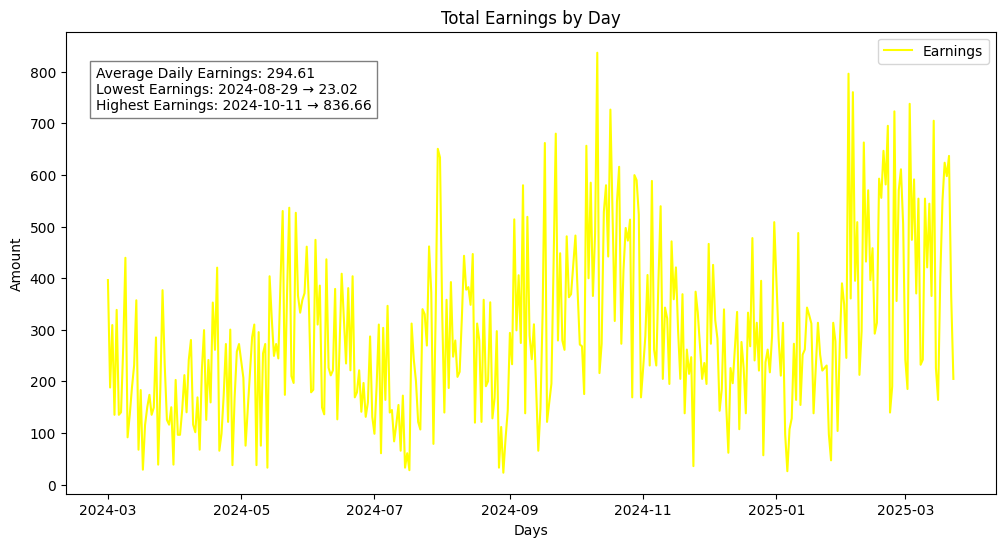

In [7]:
# Total earnings by day
df_1 = df.groupby("Date")[["money"]].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(df_1["Date"], df_1["money"], label="Earnings", color="yellow")
plt.xlabel("Days")
plt.ylabel("Amount")
plt.title("Total Earnings by Day")

# Calculate average, minimum, and maximum earnings
ortalama_kazanc = df_1["money"].mean()
min_kazanc = df_1["money"].min()
max_kazanc = df_1["money"].max()

min_day = df_1.loc[df_1["money"] == min_kazanc, "Date"].values[0]
max_day = df_1.loc[df_1["money"] == max_kazanc, "Date"].values[0]

# Convert datetime64 values to string format for better readability
min_day = pd.to_datetime(min_day).strftime("%Y-%m-%d")
max_day = pd.to_datetime(max_day).strftime("%Y-%m-%d")

plt.figtext(0.15, 0.75, 
            f"Average Daily Earnings: {ortalama_kazanc:.2f}\n"
            f"Lowest Earnings: {min_day} → {min_kazanc}\n"
            f"Highest Earnings: {max_day} → {max_kazanc}",
            bbox=dict(facecolor='white', alpha=0.5),
            fontsize=10)

plt.legend()
plt.show()


# Monthly Earnings Calculation

Instead of focusing only on daily sales, we aggregate the data by year and month. This provides a broader perspective on long-term performance and seasonal patterns.

In [8]:
# Aylık toplam kazanç
# Yıl ve ay sütunları
df_1["year"] = df_1["Date"].dt.year
df_1["month"] = df_1["Date"].dt.month
df_monthly = df_1.groupby(["year","month"], as_index=False)["money"].sum()
df_monthly.sample(10)

del df_1

# Monthly Earnings Visualization

We plot the monthly earnings on a line chart. This allows us to easily spot the months with higher or lower sales. For example, if coffee consumption increases during colder months, it will be visible here.

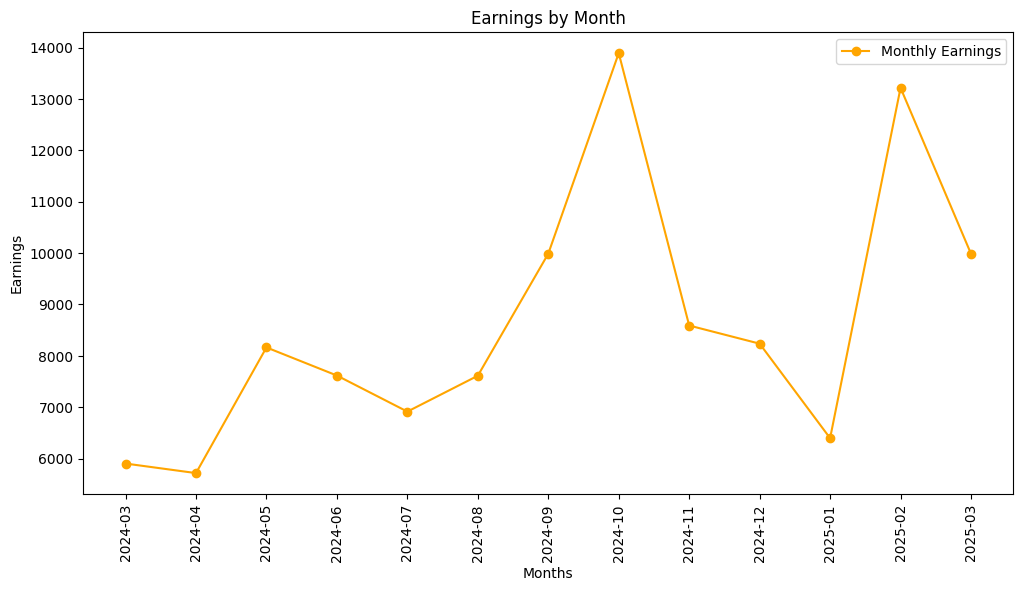

In [9]:
month_year = df_monthly["year"].astype(str) + "-" + df_monthly["month"].astype(str).str.zfill(2)
plt.figure(figsize=(12,6))
plt.plot(month_year, df_monthly["money"], marker="o", linestyle="-", color="orange", label="Monthly Earnings")
plt.xticks(rotation=90)
plt.xlabel("Months")
plt.ylabel("Earnings")
plt.title("Earnings by Month")
plt.legend()
plt.show()

del df_monthly, month_year


# Sales by Coffee Type

We analyze which coffee types generate the most revenue by grouping data by coffee_name. The bar chart shows how each coffee contributes to total sales, which is crucial for menu management and decision-making.

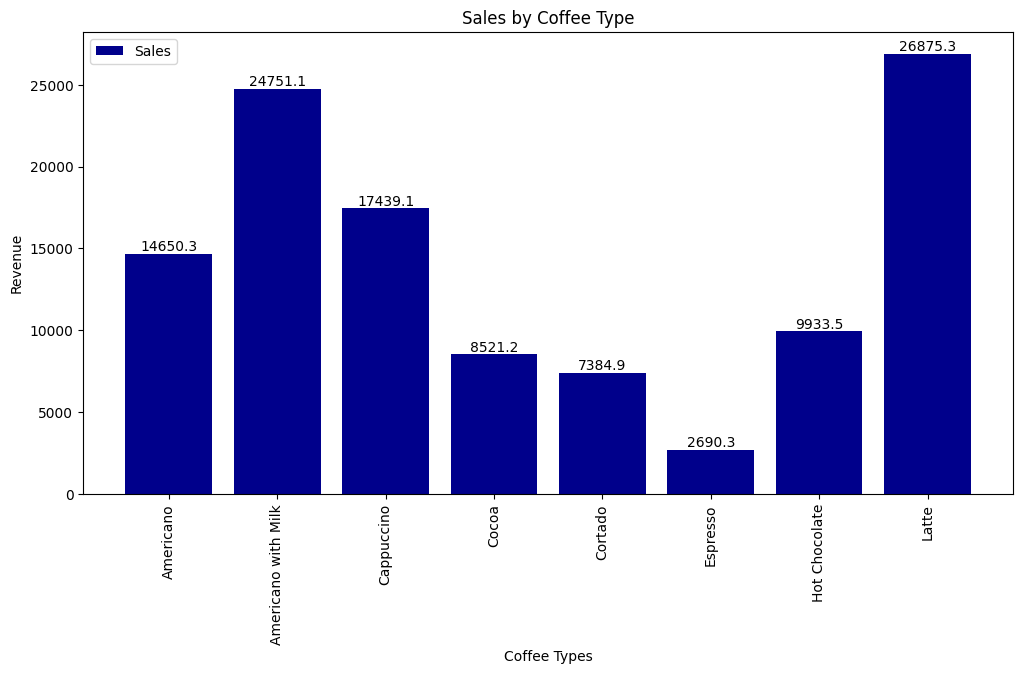

In [10]:
df_coffee_type = df.groupby("coffee_name")[["money"]].sum()
df_coffee_type["money"] = round(df_coffee_type["money"], 1)

plt.figure(figsize=(12,6))
grafik = plt.bar(x=df_coffee_type.index, height=df_coffee_type["money"], color="darkblue", label="Sales")

plt.bar_label(container=grafik, labels=df_coffee_type["money"])

plt.title("Sales by Coffee Type")
plt.xlabel("Coffee Types")
plt.ylabel("Revenue")
plt.xticks(rotation=90)
plt.legend()
plt.show()

del df_coffee_type


# Monthly Sales by Coffee Type

Now, instead of only looking at the total, we also analyze monthly sales counts for each coffee type. This helps us identify seasonal preferences—for example, whether cold drinks sell more in summer and hot drinks in winter.

In [11]:
# Aylık toplam kazanç
df_1 = df.loc[:,("coffee_name","Date")]
df_1["year"] = df_1["Date"].dt.year
df_1["month"] = df_1["Date"].dt.month
df_1 = df_1.drop(columns="Date")
df_coffee_monthly_count = df_1.groupby(["coffee_name","year","month"]).size().reset_index(name="sales_count")
df_coffee_monthly_count.sample(10)

,coffee_name,year,month,sales_count
101,Latte,2025,1,41
40,Cocoa,2024,4,4
48,Cocoa,2024,12,21
9,Americano,2024,12,27
12,Americano,2025,3,102
50,Cocoa,2025,2,56
30,Cappuccino,2024,7,32
22,Americano with Milk,2024,12,57
53,Cortado,2024,4,16
63,Cortado,2025,2,10


# Monthly Sales by Coffee Type

Now, instead of only looking at the total, we also analyze monthly sales counts for each coffee type. This helps us identify seasonal preferences—for example, whether cold drinks sell more in summer and hot drinks in winter.

# Monthly Sales of Latte

We specifically analyze Latte sales by month. The line chart highlights when Latte is most popular.

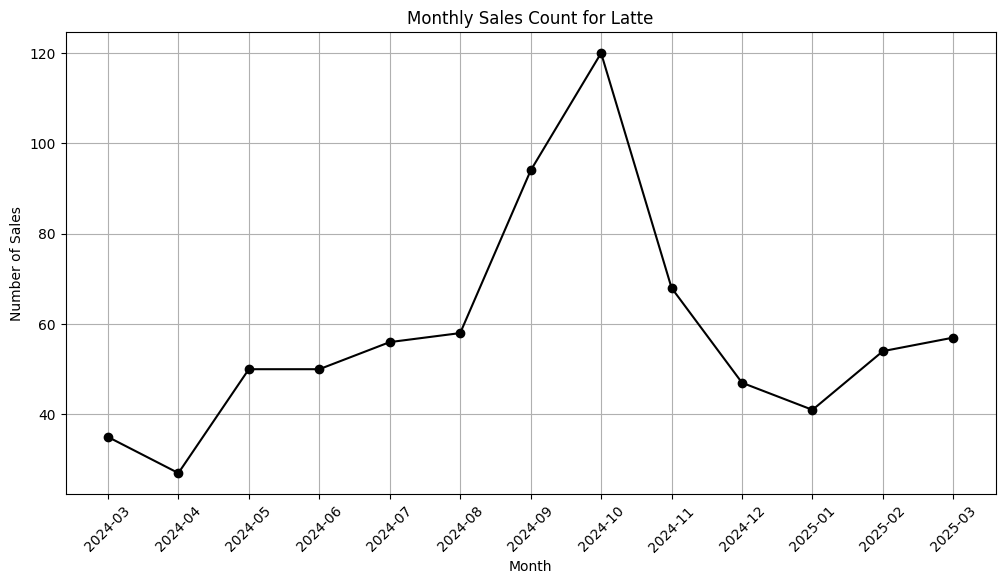

In [12]:
flt = df_coffee_monthly_count["coffee_name"] == "Latte"
month_year = df_coffee_monthly_count.loc[flt, "year"].astype(str) + "-" + df_coffee_monthly_count.loc[flt, "month"].astype(str).str.zfill(2)
sales = df_coffee_monthly_count.loc[flt, "sales_count"]

plt.figure(figsize=(12,6))
plt.plot(month_year, sales, marker="o", linestyle="-", color="k")
plt.title("Monthly Sales Count for Latte")
plt.xlabel("Month")
plt.ylabel("Number of Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Monthly Sales of Americano

Similarly, we examine Americano’s monthly sales trend. Comparing Latte and Americano provides insights into consumer preferences.

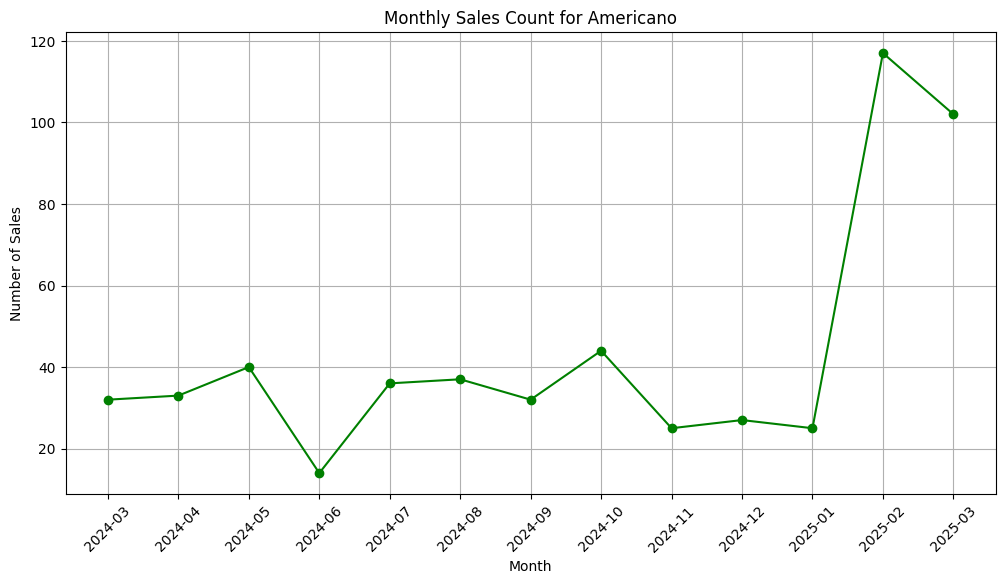

In [13]:
flt = df_coffee_monthly_count["coffee_name"] == "Americano"
month_year = df_coffee_monthly_count.loc[flt, "year"].astype(str) + "-" + df_coffee_monthly_count.loc[flt, "month"].astype(str).str.zfill(2)
sales = df_coffee_monthly_count.loc[flt, "sales_count"]

plt.figure(figsize=(12,6))
plt.plot(month_year, sales, marker="o", linestyle="-", color="green")
plt.title("Monthly Sales Count for Americano")
plt.xlabel("Month")
plt.ylabel("Number of Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Monthly Sales of Hot Chocolate

Hot Chocolate sales are plotted over time. This helps us check whether consumption increases during colder months.

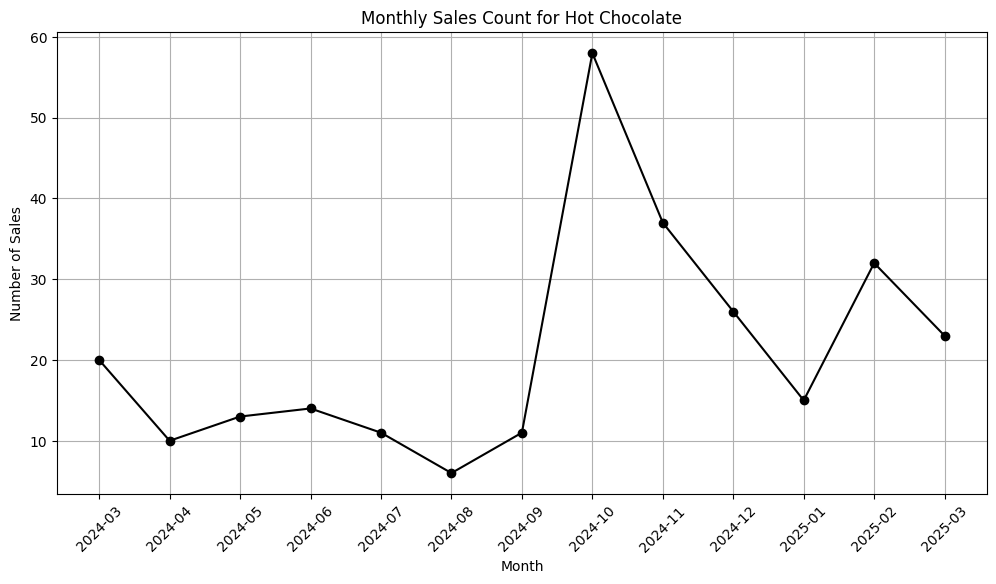

In [14]:
flt = df_coffee_monthly_count["coffee_name"] == "Hot Chocolate"
month_year = df_coffee_monthly_count.loc[flt, "year"].astype(str) + "-" + df_coffee_monthly_count.loc[flt, "month"].astype(str).str.zfill(2)
sales = df_coffee_monthly_count.loc[flt, "sales_count"]

plt.figure(figsize=(12,6))
plt.plot(month_year, sales, marker="o", linestyle="-", color="k")
plt.title("Monthly Sales Count for Hot Chocolate")
plt.xlabel("Month")
plt.ylabel("Number of Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Monthly Sales of Espresso

Espresso’s monthly sales are analyzed. This shows whether it has a stable year-round demand or fluctuates seasonally.

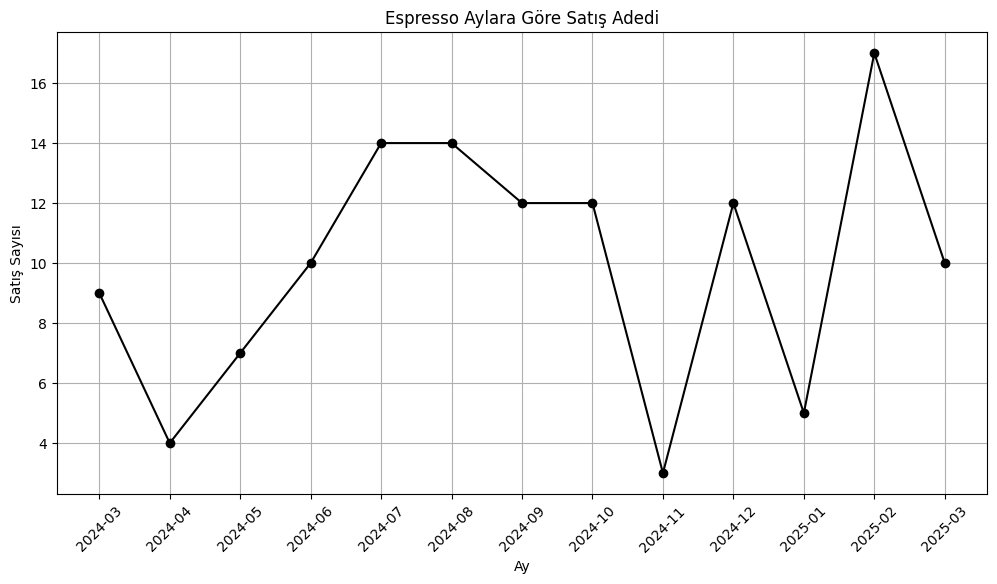

In [15]:
flt = df_coffee_monthly_count["coffee_name"] == "Espresso"
month_year = df_coffee_monthly_count.loc[flt, "year"].astype(str) + "-" + df_coffee_monthly_count.loc[flt, "month"].astype(str).str.zfill(2)
sales = df_coffee_monthly_count.loc[flt, "sales_count"]
plt.figure(figsize=(12,6))

plt.plot(month_year, sales, marker="o", linestyle="-", color="k")
plt.title("Espresso Aylara Göre Satış Adedi")
plt.xlabel("Ay")
plt.ylabel("Satış Sayısı")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Monthly Sales of Cocoa

We plot Cocoa sales by month. This allows us to see if the drink follows a seasonal trend similar to Hot Chocolate.

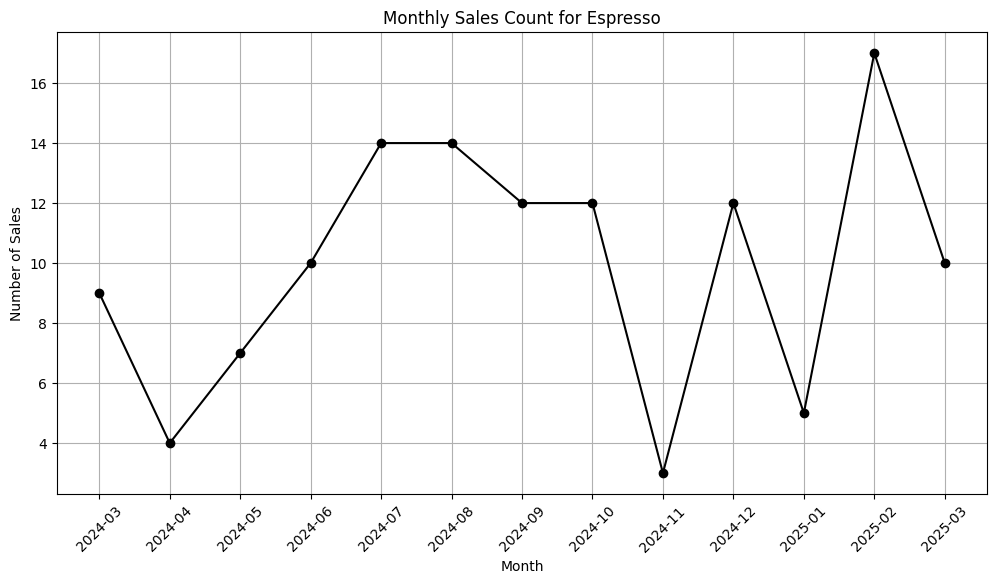

In [16]:
flt = df_coffee_monthly_count["coffee_name"] == "Espresso"
month_year = df_coffee_monthly_count.loc[flt, "year"].astype(str) + "-" + df_coffee_monthly_count.loc[flt, "month"].astype(str).str.zfill(2)
sales = df_coffee_monthly_count.loc[flt, "sales_count"]

plt.figure(figsize=(12,6))
plt.plot(month_year, sales, marker="o", linestyle="-", color="k")
plt.title("Monthly Sales Count for Espresso")
plt.xlabel("Month")
plt.ylabel("Number of Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Monthly Sales of Americano with Milk

Americano with Milk sales are analyzed separately. Comparing it to Americano shows how adding milk affects consumer preference.

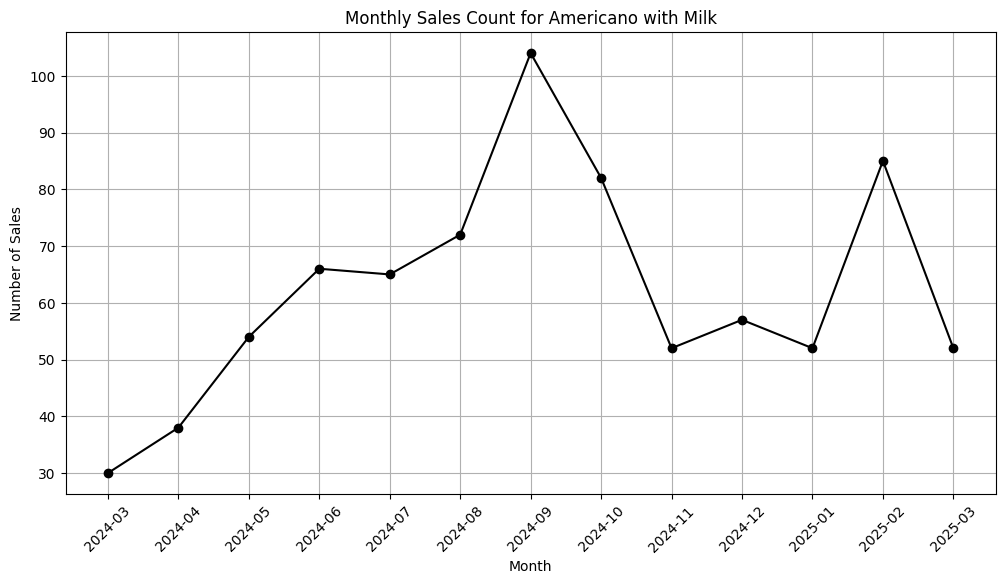

In [17]:
flt = df_coffee_monthly_count["coffee_name"] == "Americano with Milk"
month_year = df_coffee_monthly_count.loc[flt, "year"].astype(str) + "-" + df_coffee_monthly_count.loc[flt, "month"].astype(str).str.zfill(2)
sales = df_coffee_monthly_count.loc[flt, "sales_count"]

plt.figure(figsize=(12,6))
plt.plot(month_year, sales, marker="o", linestyle="-", color="k")
plt.title("Monthly Sales Count for Americano with Milk")
plt.xlabel("Month")
plt.ylabel("Number of Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Monthly Sales of Cortado

We analyze Cortado, which is a more niche coffee type. Comparing its performance to mainstream options like Latte or Cappuccino reveals interesting insights.

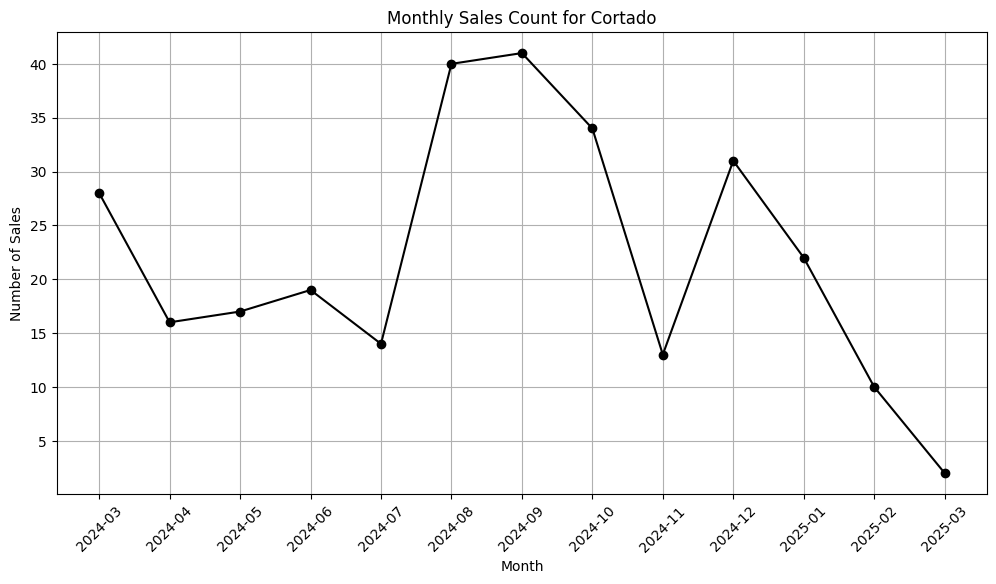

In [18]:
flt = df_coffee_monthly_count["coffee_name"] == "Cortado"
month_year = df_coffee_monthly_count.loc[flt, "year"].astype(str) + "-" + df_coffee_monthly_count.loc[flt, "month"].astype(str).str.zfill(2)
sales = df_coffee_monthly_count.loc[flt, "sales_count"]

plt.figure(figsize=(12,6))
plt.plot(month_year, sales, marker="o", linestyle="-", color="k")
plt.title("Monthly Sales Count for Cortado")
plt.xlabel("Month")
plt.ylabel("Number of Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Monthly Sales of Cappuccino

Cappuccino sales are visualized month by month. Being a classic coffee type, it is useful to compare its trend against Latte and Americano.

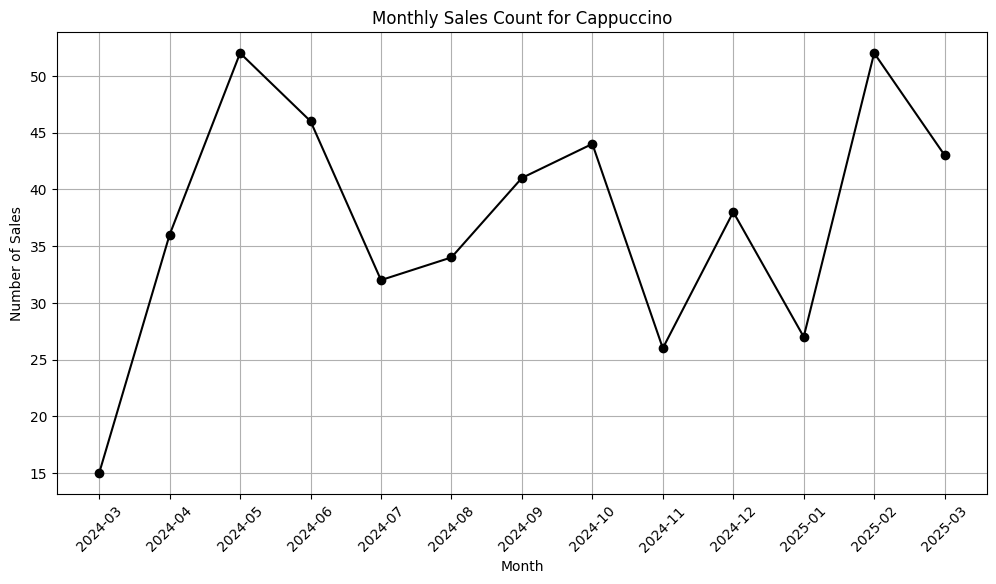

In [19]:
flt = df_coffee_monthly_count["coffee_name"] == "Cappuccino"
month_year = df_coffee_monthly_count.loc[flt, "year"].astype(str) + "-" + df_coffee_monthly_count.loc[flt, "month"].astype(str).str.zfill(2)
sales = df_coffee_monthly_count.loc[flt, "sales_count"]

plt.figure(figsize=(12,6))
plt.plot(month_year, sales, marker="o", linestyle="-", color="k")
plt.title("Monthly Sales Count for Cappuccino")
plt.xlabel("Month")
plt.ylabel("Number of Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Cleaning Up Temporary DataFrames

Finally, we delete temporary DataFrames and variables used during the analysis. This step keeps the working environment clean and reduces unnecessary memory usage.

In [20]:
del df_1,df_coffee_monthly_count,flt,month_year,sales